### Trabalho redes neurais

Professor: Leonardo Mendonza


NOME: MAYTA SOARES CUSTODIO\
MATRICULA: 192.671.147\
TURMA: 2019.2



A base apresentada é de pessoas mortas por doenças pulmonares na Inglaterra, a ideia é prever em um período de tempo  com redes LSTM. Por favor rodem o código com a base de dados, vejam os resultados e façam as seguintes mudanças.

1- Mudem o otimizador de adam para sgd dentro da configuração da rede e veja os resultados de RMSE.

2- Voltando a configuração inicial mude o numero de neurônios da camada LSTM, primeiro para 16 e depois para 48 e veja o resultado do RMSE.

3-coloque uma segunda camada LSTM e veja o resultado do RMSE.

4- Mude por dois valores que você ache convenientes as épocas de treinamento e veja o resultado do RMSE.

5- Com as mudanças feitas proponha sua configuração ideal.

Apresente um relatório com os resultados em word e explique como chegou a sua configuração ideal.

# Recurrent Neural Network - LSTM


## Parte 1 - Preprocessamento de Dados

### Importar as bibliotecas

In [ ]:
%tensorflow_version 1.x
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

TensorFlow 1.x selected.


### Importar a base de dados

In [ ]:
dataset_train = pd.read_csv('train.csv')
training_set = dataset_train.iloc[:, 1:2].values #só coluna da série em si

### gráfico da série temporal

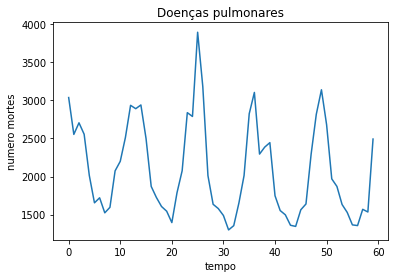

In [ ]:
plt.plot(training_set)
plt.xlabel("tempo")
plt.ylabel("numero mortes")
plt.title("Doenças pulmonares")
plt.show()

### Normalização

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

### Criar a estrutura de dados com janela 10 e output 1

In [ ]:
window = 10
trainSize = len(training_set_scaled)
X_train = []
y_train = []
for i in range(window, trainSize):
    X_train.append(training_set_scaled[i-window:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

### Reshaping

In [ ]:
X_train.shape

(50, 10)

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
X_train.shape

(50, 10, 1)

## Parte 2 - Construção da RNN

### Bibliotecas necessárias

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


### Construção da Rede completa

In [ ]:
# Registro dos outros experimentos realizados:

# Adicionar a primeira camada LSTM e Dropout 

# Primeiro teste número neurônios primeira camada: 

# regressor.add(LSTM(units = 100, return_sequences = False, input_shape = (X_train.shape[1], 1)))
#regressor.add(Dropout(0.2))

#Segundo teste número neurônios primeira camada:

# regressor.add(LSTM(units = 16, return_sequences = False, input_shape = (X_train.shape[1], 1)))
# regressor.add(Dropout(0.2))


# Terceiro teste número neurônios primeira camada:

# regressor.add(LSTM(units = 48, return_sequences = False, input_shape = (X_train.shape[1], 1)))
# regressor.add(Dropout(0.2))

In [ ]:
# Inicializar a RNN
regressor = Sequential()

# Adicionar a primeira camada LSTM e Dropout 
regressor.add(LSTM(units = 100, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
 
# Adicionar a segunda camada LSTM e Dropout
regressor.add(LSTM(units = 80, return_sequences = True))
regressor.add(Dropout(0.2))
 
# Adicionar a terceira camada LSTM e Dropout
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
 
# camada de saída
regressor.add(Dense(units = 1))
 
# Compilar a rede
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Visualizar a rede
regressor.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 10, 100)           40800     
_________________________________________________________________
dropout_4 (Dropout)          (None, 10, 100)           0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 10, 80)            57920     
_________________________________________________________________
dropout_5 (Dropout)          (None, 10, 80)            0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 50)                26200     
_________________________________________________________________
dropout_6 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                

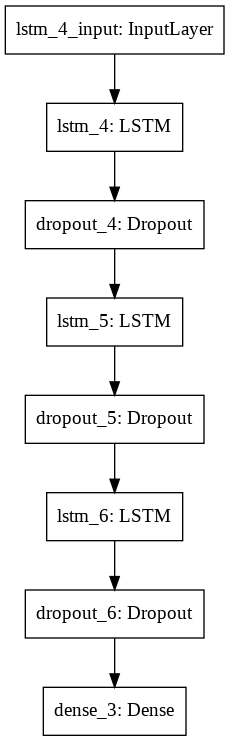

In [ ]:
from keras.utils import plot_model
plot_model(regressor)

### Treinamento

In [ ]:
history =  regressor.fit(X_train, y_train, epochs = 250, batch_size = 32)

#regressor.fit(X_train, y_train, epochs = 600, batch_size = 32)
#regressor.fit(X_train, y_train, epochs = 500, batch_size = 32)
#regressor.fit(X_train, y_train, epochs = 250, batch_size = 32)
#regressor.fit(X_train, y_train, epochs = 150, batch_size = 32)
#regressor.fit(X_train, y_train, epochs = 300, batch_size = 32)

Epoch 1/250
50/50 [==============================] - 0s 1ms/step - loss: 0.0054
Epoch 2/250
50/50 [==============================] - 0s 1ms/step - loss: 0.0056
Epoch 3/250
50/50 [==============================] - 0s 1ms/step - loss: 0.0047
Epoch 4/250
50/50 [==============================] - 0s 1ms/step - loss: 0.0062
Epoch 5/250
50/50 [==============================] - 0s 1ms/step - loss: 0.0058
Epoch 6/250
50/50 [==============================] - 0s 1ms/step - loss: 0.0040
Epoch 7/250
50/50 [==============================] - 0s 1ms/step - loss: 0.0059
Epoch 8/250
50/50 [==============================] - 0s 1ms/step - loss: 0.0047
Epoch 9/250
50/50 [==============================] - 0s 1ms/step - loss: 0.0050
Epoch 10/250
50/50 [==============================] - 0s 1ms/step - loss: 0.0038
Epoch 11/250
50/50 [==============================] - 0s 1ms/step - loss: 0.0043
Epoch 12/250
50/50 [==============================] - 0s 1ms/step - loss: 0.0055
Epoch 13/250
50/50 [=================

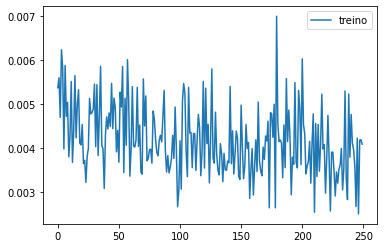

In [ ]:
plt.plot(history.history['loss'], label='treino')
plt.legend();

## Parte 3 - Fazer as previsões e analisar os resultados

### Base de teste

In [ ]:
dataset_test = pd.read_csv('test.csv')
test_pul = dataset_test.iloc[:, 1:2].values

### Construir a estrutura para teste

In [ ]:
dataset_total = pd.concat((dataset_train.iloc[:,1], dataset_test.iloc[:,1]), axis = 0)
testLength = len(dataset_test)
inputs = dataset_total[len(dataset_total) - testLength - window:].values
inputs = inputs.reshape(inputs.shape[0],1)

inputs = sc.transform(inputs)
X_test = []
for i in range(window, inputs.shape[0]): 
    X_test.append(inputs[i-window:i, 0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

### Fazer as previsões

In [ ]:
predicted = regressor.predict(X_test)
predicted = sc.inverse_transform(predicted)

### Visualizar os resultados de treino e teste

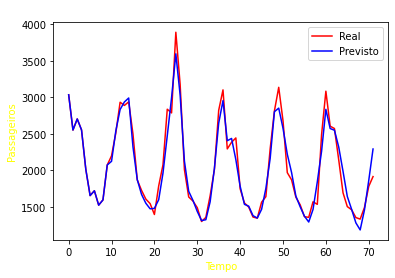

In [ ]:
allTargetData = np.vstack((training_set, test_pul))
training_predicted = regressor.predict(X_train)
training_predicted = sc.inverse_transform(training_predicted)
allForecastedData = np.vstack((training_set[0:window], training_predicted, predicted))
plt.plot(allTargetData, color = 'red', label = 'Real')
plt.plot(allForecastedData, color = 'blue', label = 'Previsto')
plt.title('Previsão de série temporal - 3 camadas - 250 épocas', color ='white')
plt.xlabel('Tempo', color='yellow')
plt.ylabel('Passageiros', color='yellow')
plt.legend()
plt.savefig('predictions_training_test.svg')
plt.show()

## Parte 4 - Métricas de avaliação

In [ ]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(test_pul, predicted))
print('RMSE: ', rmse)

RMSE:  177.20387020770562


In [ ]:
mse = mean_squared_error(test_pul, predicted)
print('MSE: ',mse)

MSE:  31401.21161658938


In [ ]:
mape = np.mean(np.abs((test_pul - predicted) / test_pul)) * 100
print('MAPE: ',mape, '%')

MAPE:  7.360768916102822 %


In [ ]:
# Calculando o coeficiente de determinação

from sklearn.metrics import r2_score
r2_score(test_pul, predicted)

0.8953906944620914